# Part I : EDA - Exploratory Data Analysis

## Part 1 Preliminary Stage: Model Description





# Preprocessing Data Function

In [1]:
import pandas as pd

def func_preliminary_imports():
  '''Function to call package and module imports and ingest the data into delivery_df.
  '''
  from modules.mod_0_preliminary import (package_and_module_imports, data_ingest)
  package_and_module_imports()
  df = data_ingest()
  
  return df


def func_preprocessing_data(df):
  '''High level call function to runs all preprocessing functions 
  to manipulate the data prior to feature engineering and returns
  the modified dataframe
  
      Args:
        df: raw data file      
  '''

  ### Identify columns and provide an explaination of why it will be removed
  pp_df_drop_cols = pd.DataFrame(
    columns=  [ 'old_column_name'            ,'exclusion_reason']
    ,  data=  [['ID'                         ,'Unique order Id']
              ,['Delivery_person_ID'         ,'Categorical Id by city, not by delivery person']
              ,['Delivery_person_Age'        ,'Does not predict delivery time']
              ,['Delivery_person_Ratings'    ,'Does not predict delivery time, to be used in ']
              ,['Restaurant_latitude'        ,'Distance will be calculated in meters']
              ,['Restaurant_longitude'       ,'Distance will be calculated in meters']
              ,['Delivery_location_latitude' ,'Distance will be calculated in meters']
              ,['Delivery_location_longitude','Distance will be calculated in meters']
              ,['Order_Date'                 ,'Does not predict delivery time']
              ,['Time_Orderd'                ,'Does not predict delivery time']
              ,['Time_Order_picked'          ,'Does not predict delivery time']
              ,['Type_of_order'              ,'Does not predict delivery time']
              ,['Festival'                   ,'Too few records are True']
              ]
  )


  ### Identify columns and provide a string of characters to be stripped from values         
  pp_df_strip_str = pd.DataFrame(
    columns=  [ 'old_column_name'    ,'strip_characters']
    ,  data=  [['Weatherconditions'  ,'conditions ']
               ,['Type_of_vehicle'    ,'electric_']
              ]  
  )                                                                                           


  ### Identify columns and provide a string of the data type to change to where those commented are already the correct datatype
  pp_df_new_dtype = pd.DataFrame(
    columns=  [ 'old_column_name'         ,'new_data_type']
    ,  data=  [['ID'	                    ,'string'] 
              ,['Delivery_person_ID'	    ,'string']
              ,['Delivery_person_Age'     ,'integer']
              ,['Delivery_person_Ratings' ,'float']
              ,['Restaurant_latitude'     ,'float']
              ,['Restaurant_longitude'    ,'float'] 
              ,['Delivery_location_latitude', 'float']
              ,['Delivery_location_longitude','float'] 
              ,['Order_Date'	            ,'date'] 
              ,['Time_Orderd'             ,'time']
              ,['Time_Order_picked'	      ,'time']
              ,['Weatherconditions'	      ,'string'] 
              ,['Road_traffic_density'    ,'string']
              ,['Vehicle_condition'	      ,'integer'] 
              ,['Type_of_order'	          ,'string'] 
              ,['Type_of_vehicle'         ,'string']            
              ,['multiple_deliveries'     ,'integer']
              ,['Festival'	              ,'string']
              ,['City'	                  ,'string']
              ,['Time_taken(min)'         ,'integer']
              ]
  )


  ### Identify columns and provide a string of the new column name
  pp_df_new_col_name = pd.DataFrame(
    columns=  [ 'old_column_name'        ,'new_column_name']
    ,  data=  [['Time_taken(min)'        ,'time_taken_min']
              ,['multiple_deliveries'    ,'multiple_deliveries']
              ,['City'                   ,'city_density']
              ,['Weatherconditions'      ,'weather']
              ,['Time_Orderd'            ,'Time_Ordered']
              ,['Type_of_vehicle'        ,'vehicle_type']
              ,['Vehicle_condition'      ,'vehicle_condition']
              ,['Road_traffic_density'   ,'road_traffic_density']
              ]
  )

  ### Apply the initial preprocessing functions
  from modules.mod_1_preprocessing import (preprocessing_initial_transformations_func)
  delivery_df_pp = preprocessing_initial_transformations_func(pp_df_strip_str
                                                              ,pp_df_new_dtype
                                                              ,pp_df_new_col_name
                                                              ,df
  )
  
  return delivery_df_pp
    
# Store and ingest raw data in a dataframe and import packages
delivery_df = func_preliminary_imports()

# Perform all preprocessing functions as specified
delivery_df_pp = func_preprocessing_data(delivery_df)

# Print the before/after results after preprocessing
from modules.mod_1_preprocessing import pp_df_post_stats
print(pp_df_post_stats)

                old_column_name              new_column_name data_type_before  \
0                            ID                           ID           object   
1            Delivery_person_ID           Delivery_person_ID           object   
2           Delivery_person_Age          Delivery_person_Age          float64   
3       Delivery_person_Ratings      Delivery_person_Ratings           object   
4           Restaurant_latitude          Restaurant_latitude          float64   
5          Restaurant_longitude         Restaurant_longitude          float64   
6    Delivery_location_latitude   Delivery_location_latitude          float64   
7   Delivery_location_longitude  Delivery_location_longitude          float64   
8                    Order_Date                   Order_Date           object   
9                   Time_Orderd                 Time_Ordered           object   
10            Time_Order_picked            Time_Order_picked           object   
11            Weatherconditi

## Feature Engineering

In [2]:
### Create a Dataframe/Series of the original columns from data ingestion
df_pp_col_names = pd.DataFrame(delivery_df_pp.columns, columns= ['new_column_name'])


### Identify columns and provide a prefix for categorical columns/features to be one-hot encoded or 'dummy' variables
fe_df_one_hot_encoding = pd.DataFrame(
  columns=  [ 'new_column_name'         ,'encoding_prefix']
  ,  data=  [['vehicle_type'            ,'vehicle_type'] 
            ,['city_density'            ,'city_density'] 
            ,['weather'                 ,'weather']
            ,['vehicle_condition'       ,'vehicle_condition']
            ,['road_traffic_density'    ,'road_traffic_density']
            ]
)


### Categorical features to be encoded into an ordinal hierarchy 
fe_df_cat_to_ordinal = pd.DataFrame(
  columns=  [ 'new_column_name'         ,  'ordinal_hierarchy']
  ,  data=  [['city_density'            , {'Metropolitian':'2'
                                          ,'Semi-Urban'   :'0'  
                                          ,'Urban'        :'1'
                                          }]
            ,['weather'                 , {'Sandstorms' :'5'
                                          ,'Stormy'     :'4'
                                          ,'Fog'        :'3'
                                          ,'Windy'      :'2'
                                          ,'Cloudy'     :'1'
                                          ,'Sunny'      :'0'
                                          }]       
            ,['road_traffic_density'    , {'Jam'    :'3'
                                          ,'High'   :'2'
                                          ,'Medium' :'1'
                                          ,'Low'    :'0'
                                          }]
            ]
)

from modules.mod_2_feature_engineering import feature_engineering_intial_transformations_func
delivery_df_fe = feature_engineering_intial_transformations_func(delivery_df_pp
                                                , fe_df_one_hot_encoding
                                                , fe_df_cat_to_ordinal)

In [3]:
# Clean Date and Time Columns
delivery_df_fe_time = delivery_df_fe.copy()

from datetime import datetime, timedelta

def combine_date_time(datecolumn: datetime, timecolumn, instance:str, df: pd.DataFrame):
    # df[f'{datecolumn}'] = pd.to_datetime(df[datecolumn], yearfirst=True, format='mixed')
    df[f'{timecolumn}'] = pd.to_datetime(df[timecolumn], format='%H:%M:%S').dt.time

    df[f'timestamp_{instance}'] = df.apply(lambda row: datetime.combine(row[f'{datecolumn}'], row[f'{timecolumn}']) if pd.notnull(row[f'{datecolumn}']) and pd.notnull(row[f'{timecolumn}']) else pd.NaT, axis=1)

    return df

delivery_df_fe = combine_date_time('Order_Date', 'Time_Ordered', 'placed', delivery_df_fe_time)
delivery_df_fe = combine_date_time('Order_Date', 'Time_Order_picked', 'picked', delivery_df_fe_time)

In [4]:
# Define a function to add a day if 'Timestamp_picked' is earlier than 'Timestamp_placed'
def add_day(row):
    if row['timestamp_picked'] < row['timestamp_placed']:
        return row['timestamp_picked'] + pd.DateOffset(days=1)
    else:
        return row['timestamp_picked']

# Modify column as needed
delivery_df_fe['timestamp_picked'] = delivery_df_fe.apply(add_day, axis=1)

# Create new Column of minutes it takes to pick up once the order is placed
delivery_df_fe['time_taken_picked_mins'] = ((delivery_df_fe['timestamp_picked'] - delivery_df_fe['timestamp_placed']).dt.total_seconds() / 60)
delivery_df_fe['time_taken_picked_mins']

0        15.0
1         5.0
2        15.0
3        10.0
4        15.0
         ... 
45588    10.0
45589    15.0
45590    15.0
45591     5.0
45592     5.0
Name: time_taken_picked_mins, Length: 45593, dtype: float64

In [5]:
# Extract Cities from the delivery ID

delivery_city_abbr = (delivery_df_fe["Delivery_person_ID"].str.split('RES').str[0]).unique()
# Map Cities in India to Abbreviations
cities = {
    'INDO': 'Indore',
    'BANG': 'Bangalore',
    'COIMB': 'Coimbatore',
    'CHEN': 'Chennai',
    'HYD': 'Hyderabad',
    'RANCHI': 'Ranchi',
    'MYS': 'Mysuru',
    'DEH': 'Delhi',
    'KOC': 'Kochi',
    'PUNE': 'Pune',
    'LUDH': 'Ludhiana',
    'KNP': 'Kanpur',
    'MUM': 'Mumbai',
    'KOL': 'Kolkata',
    'JAP': 'Jaipur',
    'SUR': 'Surat',
    'GOA': 'Goa',
    'AURG': 'Aurangabad',
    'AGR': 'Agra',
    'VAD': 'Vadodara',
    'ALH': 'Allahabad',
    'BHP': 'Bhopal'
}

# Add a new column 'City_name' based on 'Abbreviation'
delivery_df_fe['City_name'] = (delivery_df_fe["Delivery_person_ID"].str.split('RES').str[0]).map(cities)
delivery_df_fe['City_name'] = delivery_df_fe['City_name'].astype('str') 
delivery_df_fe['City_name'].unique()

array(['Indore', 'Bangalore', 'Coimbatore', 'Chennai', 'Hyderabad',
       'Ranchi', 'Mysuru', 'Delhi', 'Kochi', 'Pune', 'Ludhiana', 'Kanpur',
       'Mumbai', 'Kolkata', 'Jaipur', 'Surat', 'Goa', 'Aurangabad',
       'Agra', 'Vadodara', 'Allahabad', 'Bhopal'], dtype=object)

In [6]:
from math import sin, cos, sqrt, atan2, radians

def distance(lat1, lon1, lat2, lon2):

    if pd.notna(lat1) and pd.notna(lon1) and pd.notna(lat2) and pd.notna(lon2):

        if lat1 < 1 or lon1 < 1 or lat2 < 1 or lon2 < 1 :
            return 

        R = 6373.0  # approximate radius of Earth in km

        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlon = lon2 - lon1
        dlat = lat2 - lat1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))

        distance = R * c
        return distance
    else: 
        return 


# Calculate the distance between the two points for each row
delivery_df_fe['Distance_km'] = delivery_df_fe.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)
delivery_df_fe['Distance_km'].describe()


count    41522.000000
mean         9.723173
std          5.604784
min          1.465178
25%          4.659074
50%          9.195767
75%         13.684968
max         20.976494
Name: Distance_km, dtype: float64

In [7]:
# Drop all columns unable to be modeled
delivery_df_model = delivery_df_fe.drop(columns=delivery_df_fe.select_dtypes(include=['object', 'string', 'datetime64']).columns)
delivery_df_model = delivery_df_model.drop(columns=['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'])
delivery_df_model.dtypes

#drop all Nan data
delivery_df_model.dropna(inplace = True)

In [8]:
# Save the preprocessed dataframe to Joblib
import joblib

joblib.dump(delivery_df_fe, "../data/delivery_df_fe.csv")
joblib.dump(delivery_df_model, "../data/delivery_df_model.csv")


['../data/delivery_df_model.csv']

In [9]:
delivery_df_model.describe()

,Delivery_person_Age,Delivery_person_Ratings,vehicle_condition,multiple_deliveries,time_taken_min,weather_Cloudy,weather_Fog,weather_Sandstorms,weather_Stormy,weather_Sunny,...,vehicle_condition_3,vehicle_type_bicycle,vehicle_type_motorcycle,vehicle_type_scooter,city_density_Metropolitian,city_density_Semi-Urban,city_density_Urban,city_density_ordinal,time_taken_picked_mins,Distance_km
count,38097.0,38097.000000,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,...,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,38097.0,38097.000000,38097.000000
mean,29.588524,4.632443,0.996588,0.74683,26.508728,0.167546,0.170775,0.165945,0.169068,0.161299,...,0.0,0.0,0.588708,0.411292,0.769509,0.003622,0.226868,1.765887,9.982020,9.752490
std,5.763152,0.316504,0.817143,0.573164,9.370561,0.373468,0.376317,0.372036,0.374817,0.367811,...,0.0,0.0,0.492074,0.492074,0.421152,0.060077,0.418812,0.431919,4.085951,5.605249
min,20.0,2.500000,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000,1.465178
25%,25.0,4.500000,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,5.000000,4.659358
50%,30.0,4.700000,1.0,1.0,26.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,10.000000,9.222508
75%,35.0,4.900000,2.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,15.000000,13.685534
max,39.0,5.000000,2.0,3.0,54.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,15.000000,20.976494


## Modelling

In [10]:
# Create two models, one using ordinal hierarchies and the other one hot encoding for the weather, road traffic density and city density columns

model_ordinal = delivery_df_model.drop(columns=['weather_Cloudy', 'weather_Fog', 'weather_Sandstorms', 'weather_Stormy',
       'weather_Sunny', 'weather_Windy','road_traffic_density_High', 'road_traffic_density_Jam',
       'road_traffic_density_Low', 'road_traffic_density_Medium','city_density_Metropolitian',
       'city_density_Semi-Urban', 'city_density_Urban'])

model_hot = delivery_df_model.drop(columns=['weather_ordinal', 'city_density_ordinal','road_traffic_density_ordinal'])



In [11]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import  MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.model_selection import train_test_split

### The Ordinal columns Models

In [12]:
X_predictors = model_ordinal.drop(columns=['time_taken_min'])
y_outcome = model_ordinal['time_taken_min']

In [13]:
# Prepare the data for Modelling
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y_outcome, test_size=0.3, stratify=y_outcome, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

model_estimators = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(alpha=1.0),
          'Lasso Regression': Lasso(alpha=1.0),
          'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5)}

fitted_models = {}
model_metrics = []
model_y_pred = {}
model_res = {}

for name, model in model_estimators.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    y_pred = fitted_models[name].predict(X_test)
    
    model_metrics.append({
        'model': name,
        'r2_score': metrics.r2_score(y_test, y_pred), 
        'mean_absolute_error': metrics.mean_absolute_error(y_test, y_pred), 
        "mean_squared_error": metrics.mean_squared_error(y_test, y_pred),
    })
    
    model_y_pred[name] = y_pred
    model_res[name] = y_test - y_pred

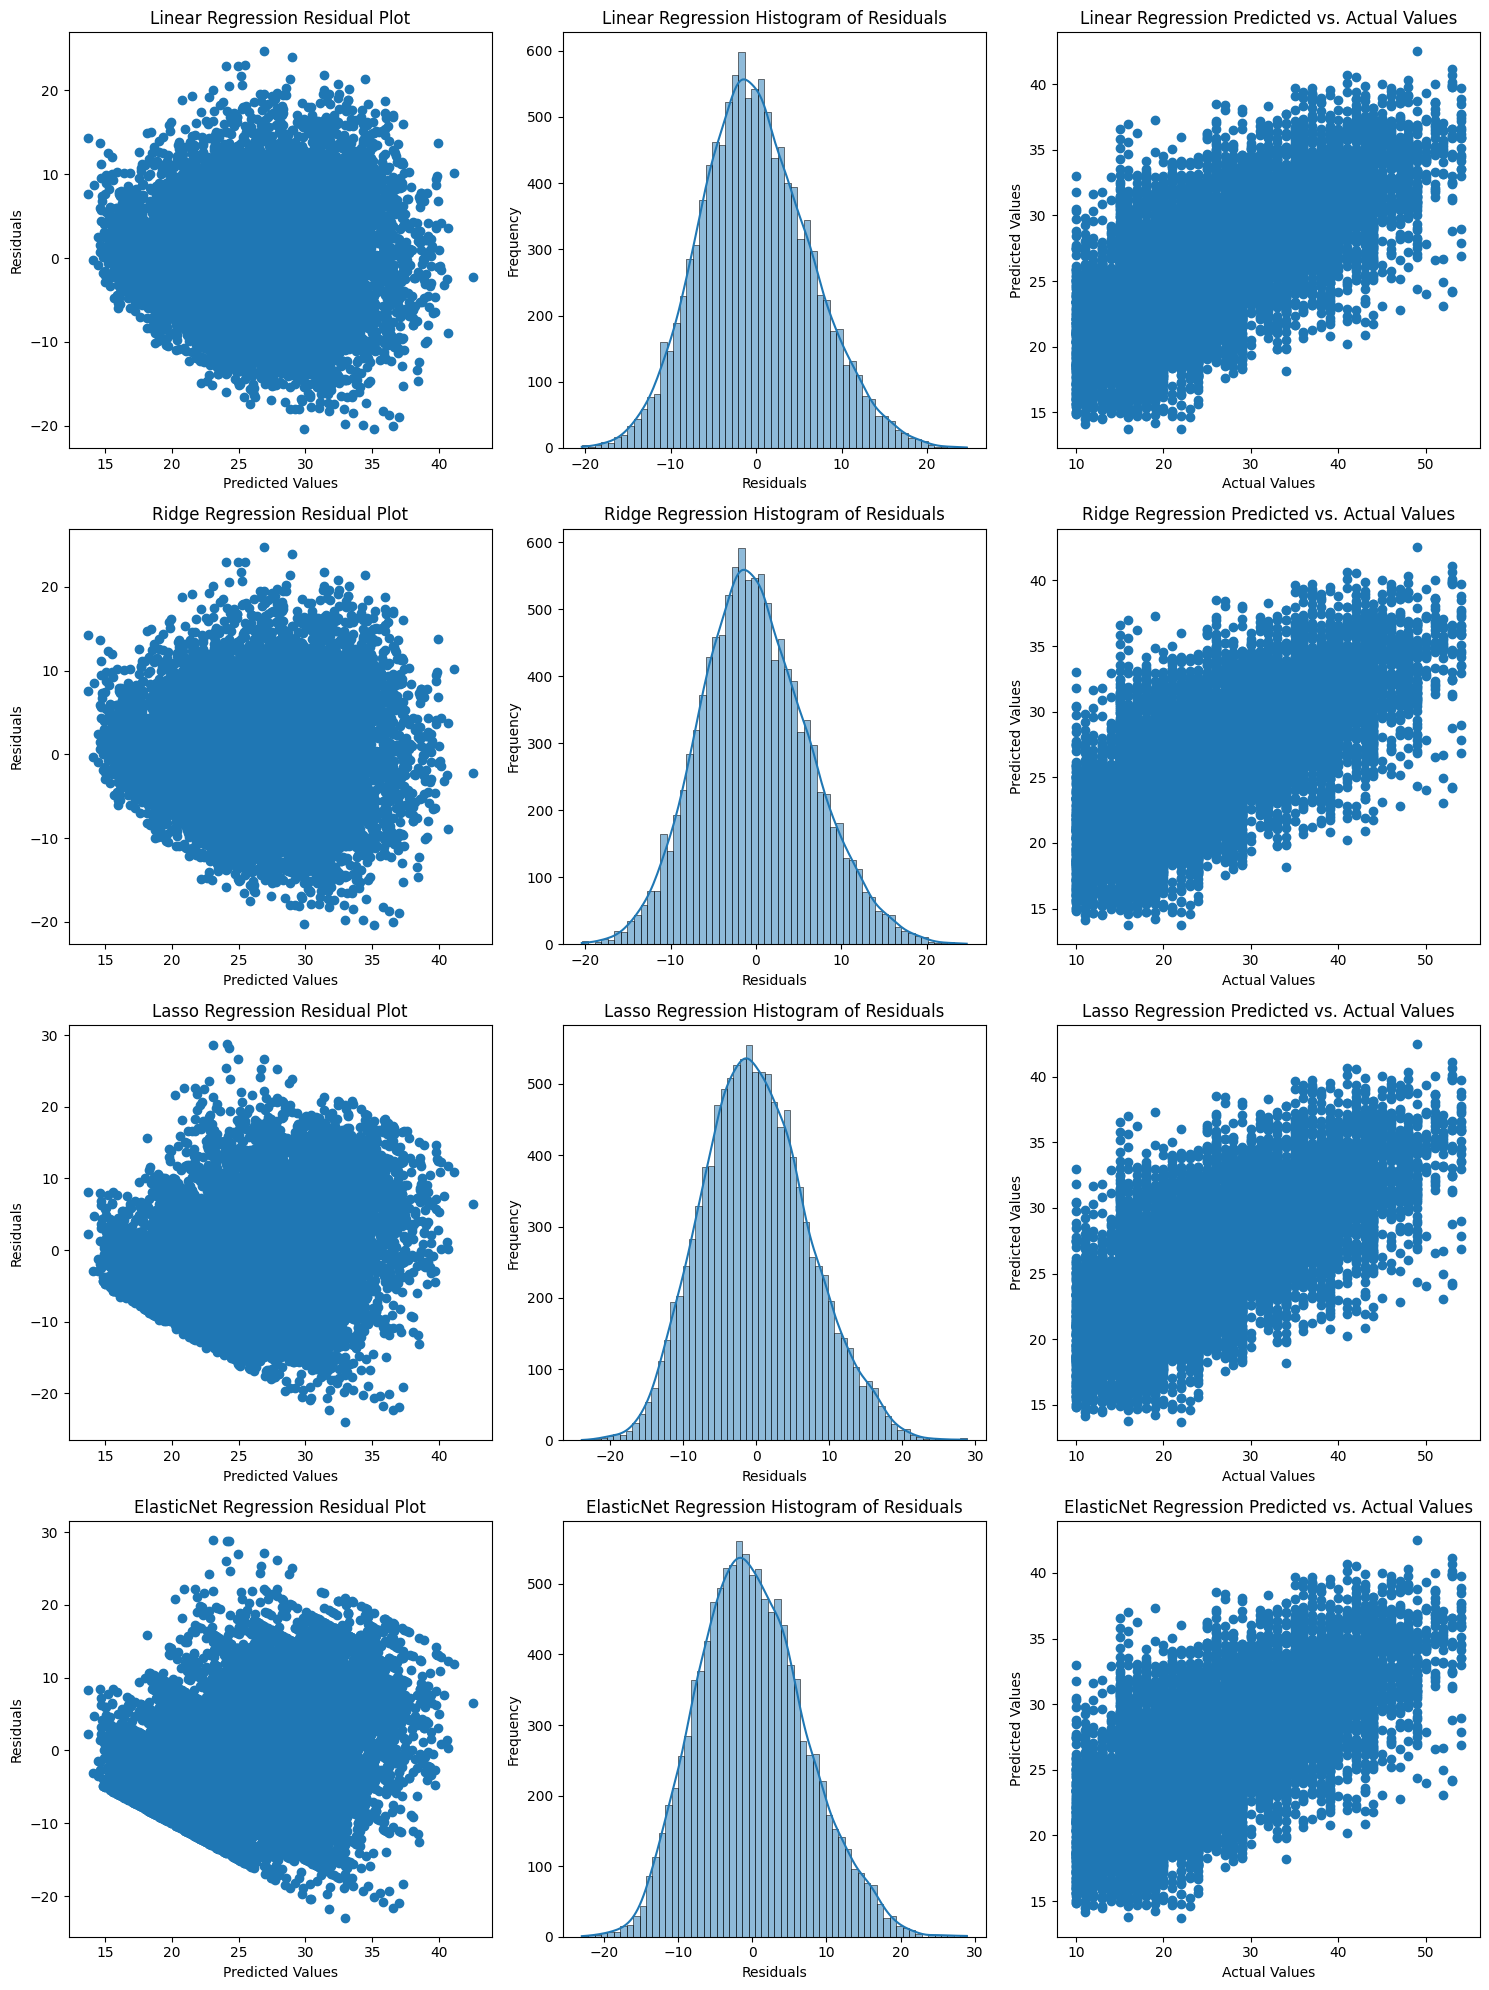

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(len(model_y_pred), 3, figsize=(15, 5*len(model_y_pred)))

for i, (name, model) in enumerate(model_y_pred.items()):
    residuals = y_test - model_y_pred[name]

    # Residual plot
    axs[i, 0].scatter(y_pred, residuals)
    axs[i, 0].set_xlabel('Predicted Values')
    axs[i, 0].set_ylabel('Residuals')
    axs[i, 0].set_title(f'{name} Residual Plot')

    # Histogram of residuals
    sns.histplot(residuals, kde=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel('Residuals')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_title(f'{name} Histogram of Residuals')

    # Scatter plot of predicted vs. actual values
    axs[i, 2].scatter(y_test, y_pred)
    axs[i, 2].set_xlabel('Actual Values')
    axs[i, 2].set_ylabel('Predicted Values')
    axs[i, 2].set_title(f'{name} Predicted vs. Actual Values')

plt.tight_layout()
plt.show()

In [16]:
score_df = pd.DataFrame(model_metrics)
print(score_df)

                   model  r2_score  mean_absolute_error  mean_squared_error
0      Linear Regression  0.528083             5.124706           41.406782
1       Ridge Regression  0.528262             5.122194           41.391064
2       Lasso Regression  0.398366             5.828279           52.788321
3  ElasticNet Regression  0.403072             5.812442           52.375459


### The One Hot Encoded Columns Models

In [17]:
X_predictors = model_hot.drop(columns=['time_taken_min'])
y_outcome = model_hot['time_taken_min']

In [18]:
# Prepare the data for Modelling
X_train, X_test, y_train, y_test = train_test_split(X_predictors, y_outcome, test_size=0.3, stratify=y_outcome, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

model_estimators = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(alpha=1.0),
          'Lasso Regression': Lasso(alpha=1.0),
          'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5)}

fitted_models = {}
model_metrics = []
model_y_pred = {}
model_res = {}

for name, model in model_estimators.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model
    y_pred = fitted_models[name].predict(X_test)
    
    model_metrics.append({
        'model': name,
        'r2_score': metrics.r2_score(y_test, y_pred), 
        'mean_absolute_error': metrics.mean_absolute_error(y_test, y_pred), 
        "mean_squared_error": metrics.mean_squared_error(y_test, y_pred),
    })
    
    model_y_pred[name] = y_pred
    model_res[name] = y_test - y_pred

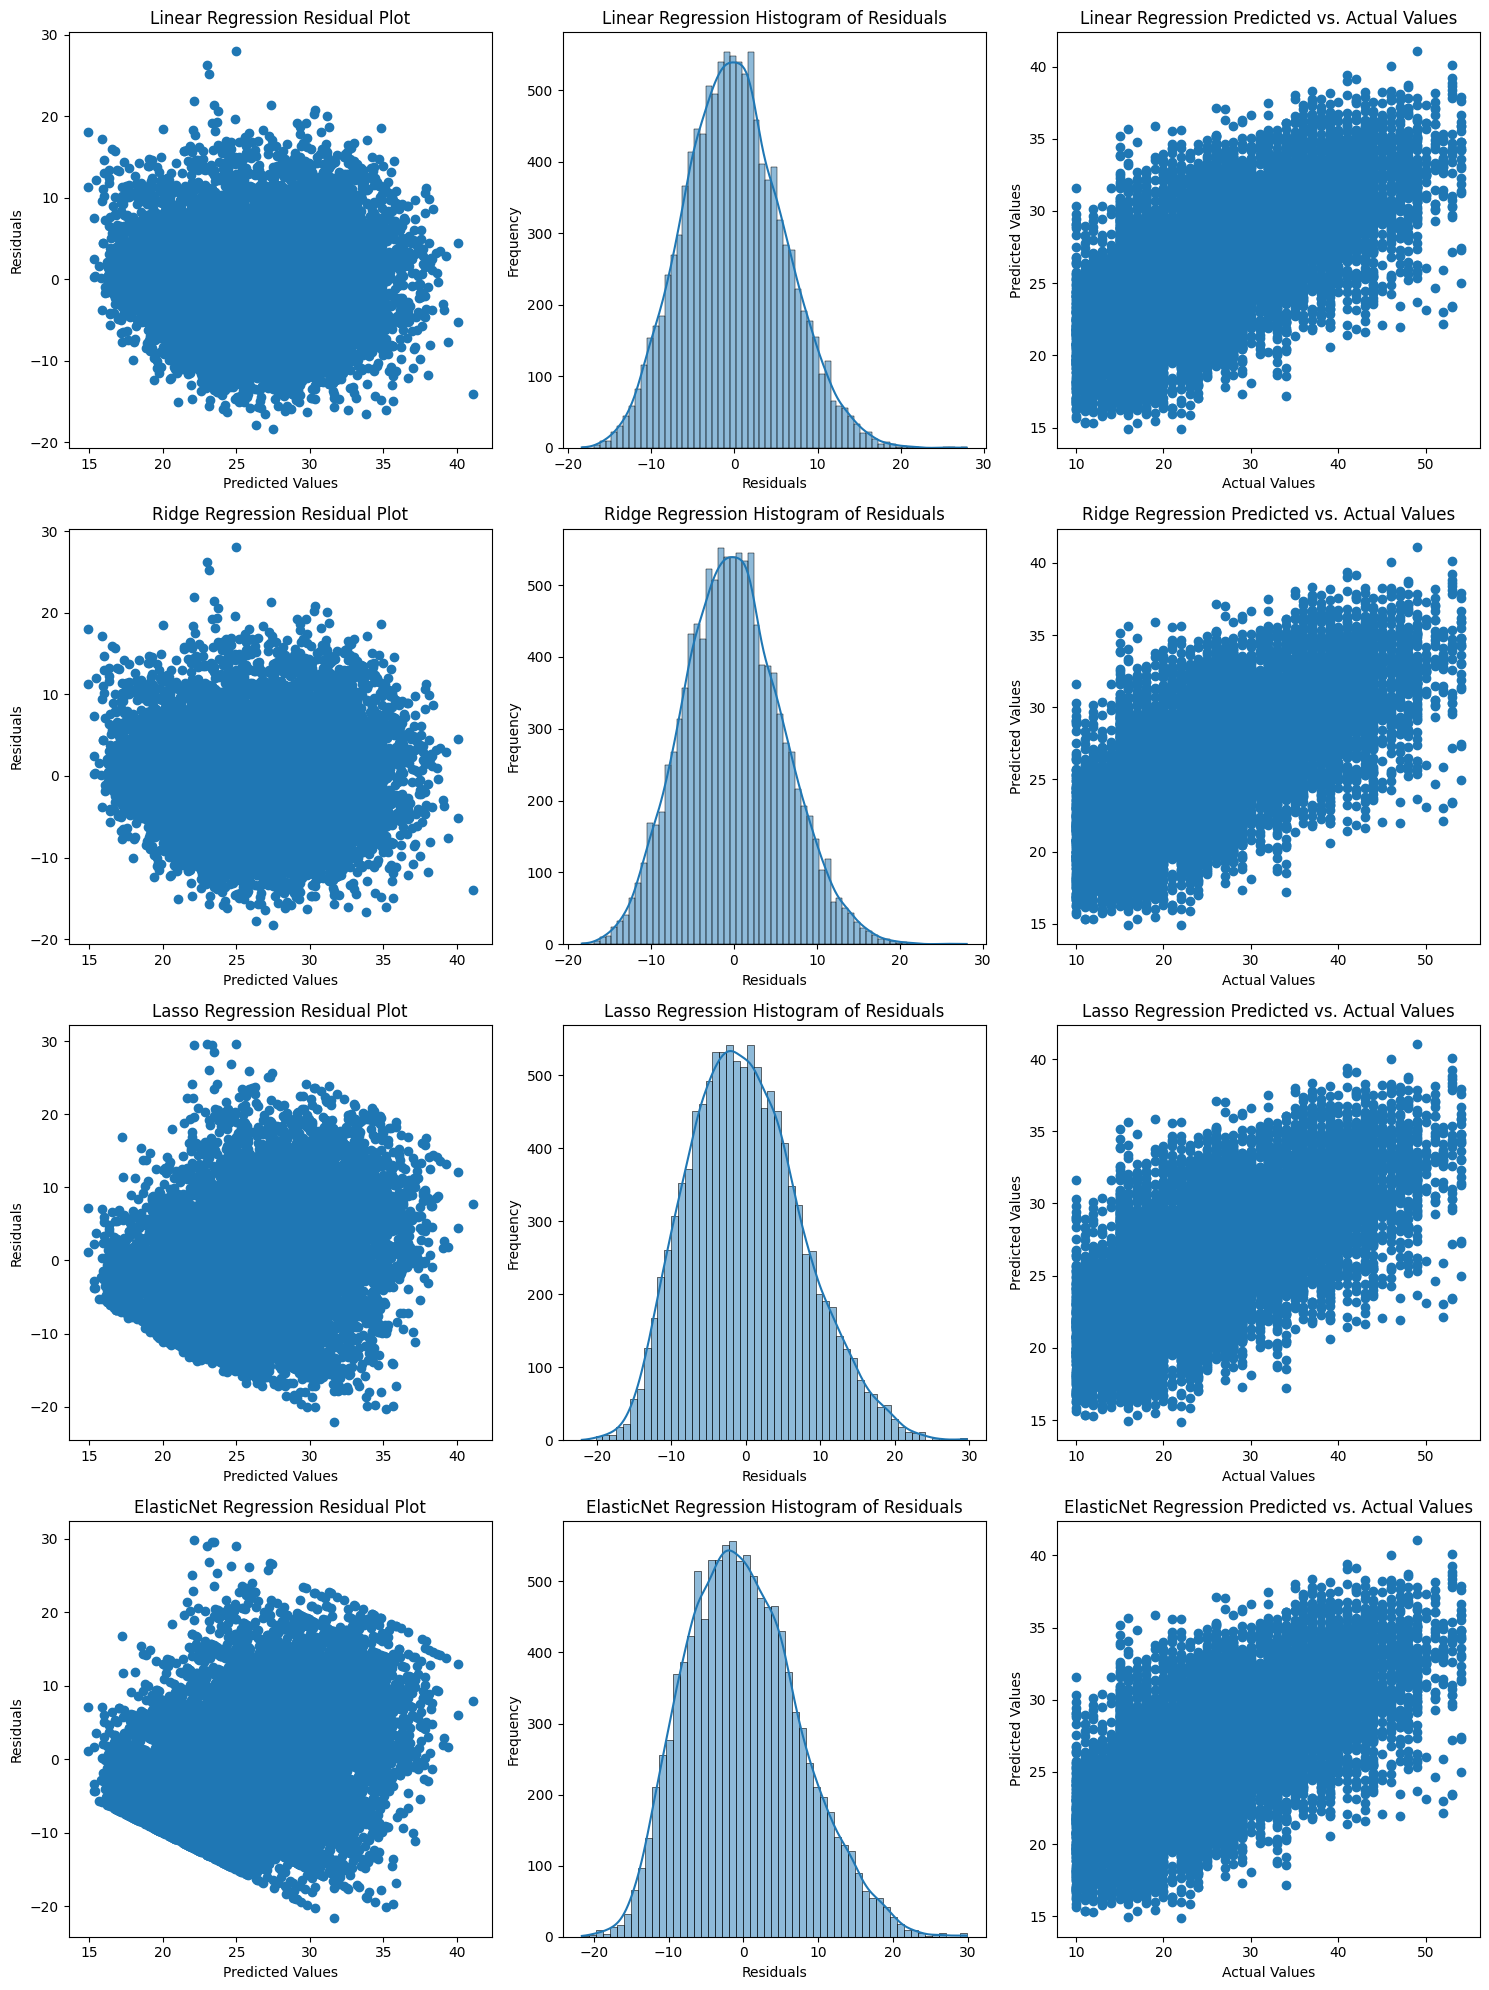

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(len(model_y_pred), 3, figsize=(15, 5*len(model_y_pred)))

for i, (name, model) in enumerate(model_y_pred.items()):
    residuals = y_test - model_y_pred[name]

    # Residual plot
    axs[i, 0].scatter(y_pred, residuals)
    axs[i, 0].set_xlabel('Predicted Values')
    axs[i, 0].set_ylabel('Residuals')
    axs[i, 0].set_title(f'{name} Residual Plot')

    # Histogram of residuals
    sns.histplot(residuals, kde=True, ax=axs[i, 1])
    axs[i, 1].set_xlabel('Residuals')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].set_title(f'{name} Histogram of Residuals')

    # Scatter plot of predicted vs. actual values
    axs[i, 2].scatter(y_test, y_pred)
    axs[i, 2].set_xlabel('Actual Values')
    axs[i, 2].set_ylabel('Predicted Values')
    axs[i, 2].set_title(f'{name} Predicted vs. Actual Values')

plt.tight_layout()
plt.show()

In [21]:
score_df = pd.DataFrame(model_metrics)
print(score_df)

                   model  r2_score  mean_absolute_error  mean_squared_error
0      Linear Regression  0.593059             4.777799           35.705628
1       Ridge Regression  0.593207             4.775590           35.692696
2       Lasso Regression  0.343796             6.117981           57.576408
3  ElasticNet Regression  0.351621             6.090711           56.889857
